In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import profile

In [2]:
pip install -U pandas-profiling 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\saheediyanda\anaconda3\lib\site-packages (from requests<2.29,>=2.24.0->pandas-profiling) (1.26.7)



In [3]:
pip install -U pandas-profiling[notebook,unicode]

Note: you may need to restart the kernel to use updated packages.


In [4]:
import profile
from pandas_profiling import ProfileReport

In [5]:
df_1 = pd.read_csv('PracticalRegression.csv')

In [6]:
profile = ProfileReport(df_1, title="Pandas Profiling Report")

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df_1.Brand.value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [5]:
order = ['Volkswagen ','Mercedes-Benz','BMW','Toyota','Renault']

In [6]:
#Extracting the volkswagen and Renault Brand
data_brand=df_1[(df_1['Brand']=='Volkswagen')|(df_1['Brand']=='Mercedes-Benz')|(df_1['Brand']=='BMW')|(df_1['Brand']=='Toyota')|(df_1['Brand']=='Renault')]
a =data_brand.Brand.value_counts(ascending=False)
a

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Name: Brand, dtype: int64

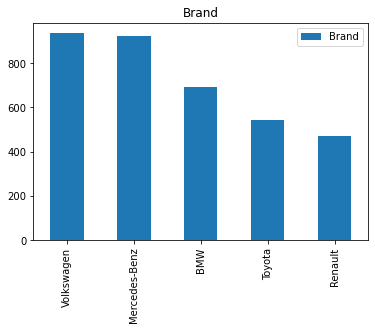

In [7]:
# extrating the brand count in descecending order
a.plot(kind='bar')
plt.title('Brand')
plt.legend()
plt.show()

In [8]:
pallete = {'Volkswagen':'Green','BMW':'Red','Mercedes-Benz':'orange'}

<AxesSubplot:xlabel='count', ylabel='Brand'>

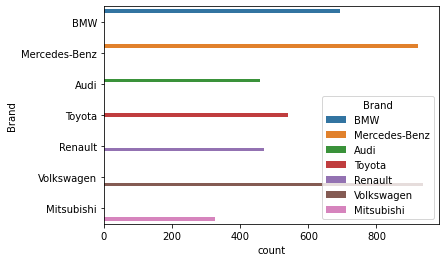

In [9]:
# The second method of getting countplot
sns.countplot(y = 'Brand', data=df_1,hue='Brand')

In [10]:
pallete = {'Volkswagen':'Green','BMW':'Red','Mercedes-Benz':'orange'}

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


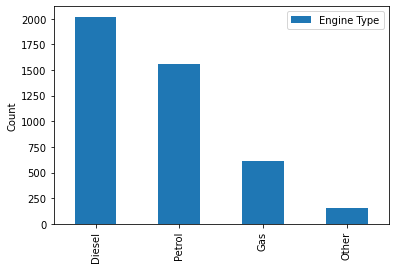

In [12]:
# extracting the Engine v values
df_1['Engine Type'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.legend()
plt.show()

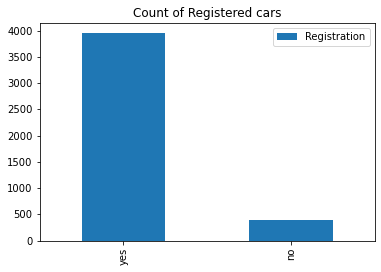

In [13]:
# extracting the Registration values
df_1['Registration'].value_counts().plot(kind = 'bar')
plt.title('Count of Registered cars')
plt.legend()
plt.show()

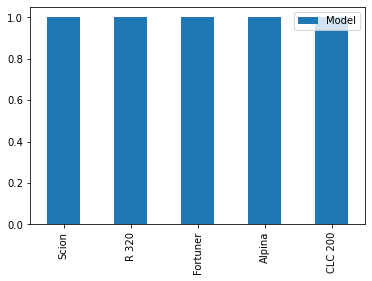

In [14]:
#the lowest five model count
df_1['Model'].value_counts(ascending=True)[0:5].plot(kind='bar')
plt.legend()
plt.show()

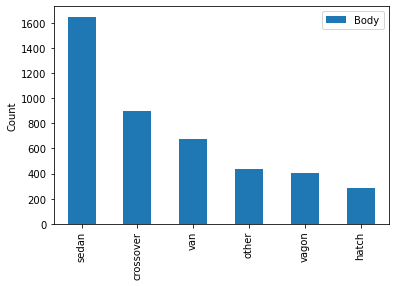

In [15]:
# extracting the Body values
df_1['Body'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.legend()
plt.show()

<AxesSubplot:>

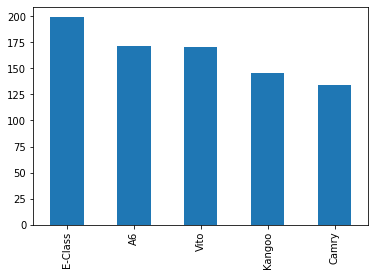

In [16]:
# extracting the Model values
# The top five minimum count model
df_1['Model'].value_counts()[0:5].plot(kind='bar')

In [17]:
df_1.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [18]:
# df_1.duplicated().any()
df_1['Year'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4340     True
4341     True
4342     True
4343     True
4344     True
Name: Year, Length: 4345, dtype: bool

In [19]:
df_1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [20]:
df_1.dropna(axis=0,inplace=True)

In [21]:
df_1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

No handles with labels found to put in legend.


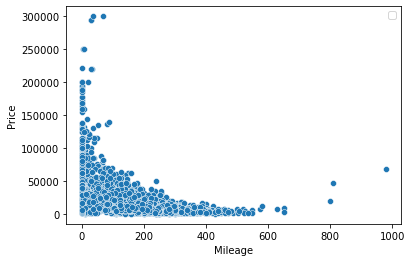

In [22]:
# plotting the scatterplot to view the relationship of some columns with Price
sns.scatterplot(x='Mileage',y='Price',data=df_1)
plt.legend()
plt.show()

In [23]:
# dealing with outliers in the milleage
data_ml = df_1['Mileage'] <=600

In [24]:
df_1.loc[data_ml]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [84]:
# Extracting the number of model per year
df_1.groupby(['Brand','Year','Registration','Model'])['Model'].count()

Brand       Year  Registration  Model    
Audi        1980  yes           80           1
            1985  yes           80           1
            1986  yes           100          1
                                80           1
            1987  yes           100          1
                                            ..
Volkswagen  2016  yes           Passat B8    4
                                Polo         5
                                Tiguan       1
                                Touareg      6
                                Touran       1
Name: Model, Length: 1554, dtype: int64

In [92]:
# getting the total number of Brand car in reference to registration
df_1.groupby(['Brand','Registration'])['Registration'].count()

Brand          Registration
Audi           no               92
               yes             328
BMW            no              105
               yes             535
Mercedes-Benz  no               67
               yes             756
Mitsubishi     no               10
               yes             297
Renault        no               25
               yes             420
Toyota         no                4
               yes             506
Volkswagen     no               68
               yes             812
Name: Registration, dtype: int64

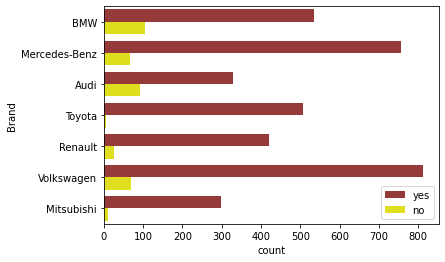

In [100]:
# Visual reperesentation of brand cars in reference with registration
sns.countplot(y='Brand',data=df_1,hue='Registration',palette={'yes':'brown','no':'yellow'})
plt.legend()
plt.show()

In [85]:
# getting the total number of  model of each brand
df_1.groupby(['Brand','Registration','Model'])['Model'].count()

Brand       Registration  Model     
Audi        no            80             2
                          A3             3
                          A4            18
                          A6            59
                          A6 Allroad     3
                                        ..
Volkswagen  yes           Tiguan        17
                          Touareg       62
                          Touran        14
                          Up             2
                          Vento          5
Name: Model, Length: 386, dtype: int64

No handles with labels found to put in legend.


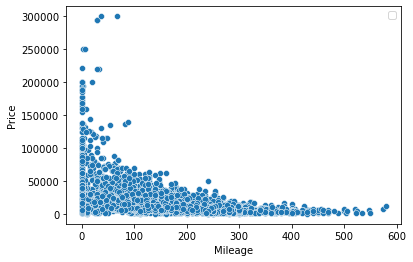

In [25]:
sns.scatterplot(x='Mileage',y='Price',data=df_1.loc[data_ml])
plt.legend()
plt.show()

No handles with labels found to put in legend.


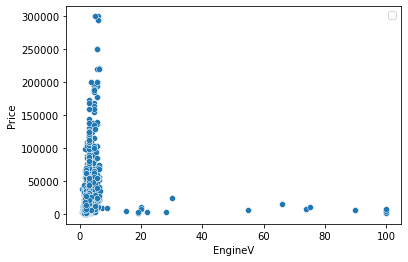

In [26]:
sns.scatterplot(x='EngineV',y='Price',data=df_1.loc[data_ml])
plt.legend()
plt.show()

In [27]:
df_1.shape

(4025, 9)

In [28]:
# Grouping by Engine Type in reference with the price
data_E = df_1.groupby(['Engine Type','Mileage'])['Price'].agg([np.sum,np.average])

In [29]:
data_E

sum       average
Engine Type Mileage                          
Diesel      0        6823646.47  71827.857579
            1        2632674.75  43158.602459
            2         373805.00  53400.714286
            3         457622.00  57202.750000
            4         253299.00  84433.000000
...                         ...           ...
Petrol      440         5500.00   5500.000000
            448         7200.00   7200.000000
            460         4000.00   4000.000000
            470         3600.00   3600.000000
            488         2500.00   2500.000000

[994 rows x 2 columns]

No handles with labels found to put in legend.


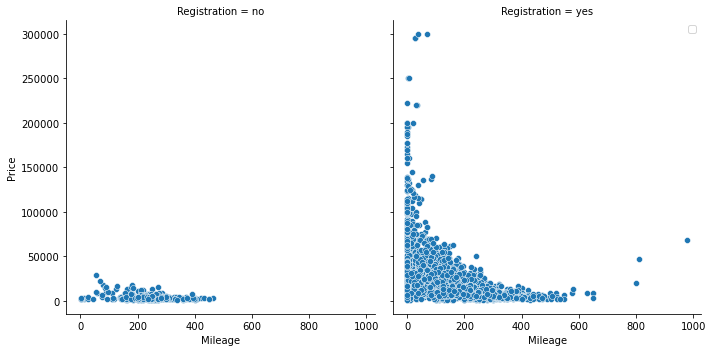

In [30]:
sns.relplot(x='Mileage',y='Price',data=df_1,kind= 'scatter',col='Registration',col_order=['no','yes'])
plt.legend()
plt.show()

In [31]:
df_1.groupby(['Brand','Model'])['Price'].agg([np.sum,np.average,np.max,np.min])

sum       average     amax     amin
Brand      Model                                              
Audi       100        64639.00   3802.294118   5000.0   2400.0
           80         32862.50   2738.541667   7000.0    600.0
           90          3500.00   3500.000000   3500.0   3500.0
           A1         46499.00  15499.666667  16999.0  14500.0
           A3        147514.00  13410.363636  30999.0   2500.0
...                        ...           ...      ...      ...
Volkswagen Tiguan    402600.00  23682.352941  35000.0  15200.0
           Touareg  1995193.55  30695.285385  74500.0   4000.0
           Touran    257239.00  13538.894737  33700.0   3500.0
           Up         20650.00  10325.000000  12650.0   8000.0
           Vento      20950.00   3491.666667   4400.0   1550.0

[307 rows x 4 columns]

In [32]:
df_1['Brand']=='Audi'

0       False
1       False
2       False
3        True
4       False
        ...  
4339    False
4340    False
4341    False
4342    False
4344    False
Name: Brand, Length: 4025, dtype: bool

In [48]:
[df_1.loc[df_1['Brand']=='Audi'].groupby(['Brand','Mileage','Model'])['Price'].agg([np.sum,np.average])][0]

sum       average
Brand Mileage Model                         
Audi  0       A6      63200.00  63200.000000
              A7      81500.00  81500.000000
              Q3      34419.45  34419.450000
              Q5      52055.25  52055.250000
              Q7     509107.00  84851.166667
...                        ...           ...
      413     100      3990.00   3990.000000
      420     A3       3700.00   3700.000000
      421     A6       6500.00   6500.000000
      450     A6       4650.00   2325.000000
      470     A6       6700.00   6700.000000

[331 rows x 2 columns]

In [53]:
# The unique name of each model
df_1.loc[df_1['Brand']=='Audi']['Model'].unique()

array(['Q7', 'A6', 'A6 Allroad', 'A8', '100', 'TT', 'A3', 'A5', '80',
       'A4 Allroad', '90', 'A4', 'A7', 'Q5', 'Q3', 'R8', 'S4', 'A1', 'S5',
       'S8'], dtype=object)

No handles with labels found to put in legend.


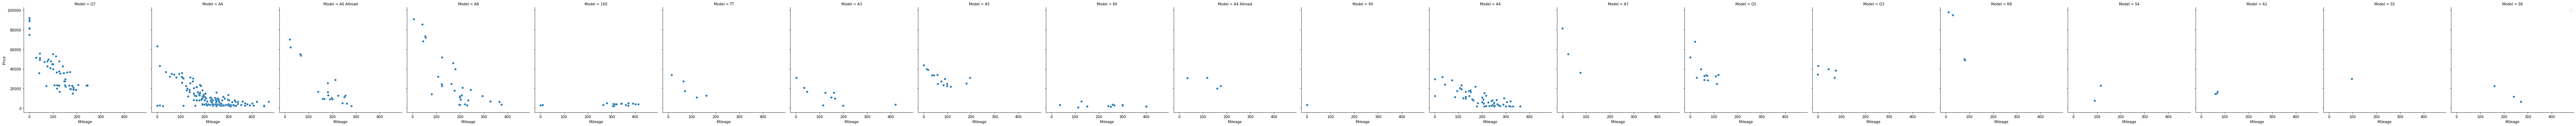

In [56]:
sns.relplot(x='Mileage',y='Price',data=df_1.loc[df_1['Brand']=='Audi'],kind='scatter',col='Model')
plt.legend()
plt.show()

In [57]:
df_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


No handles with labels found to put in legend.


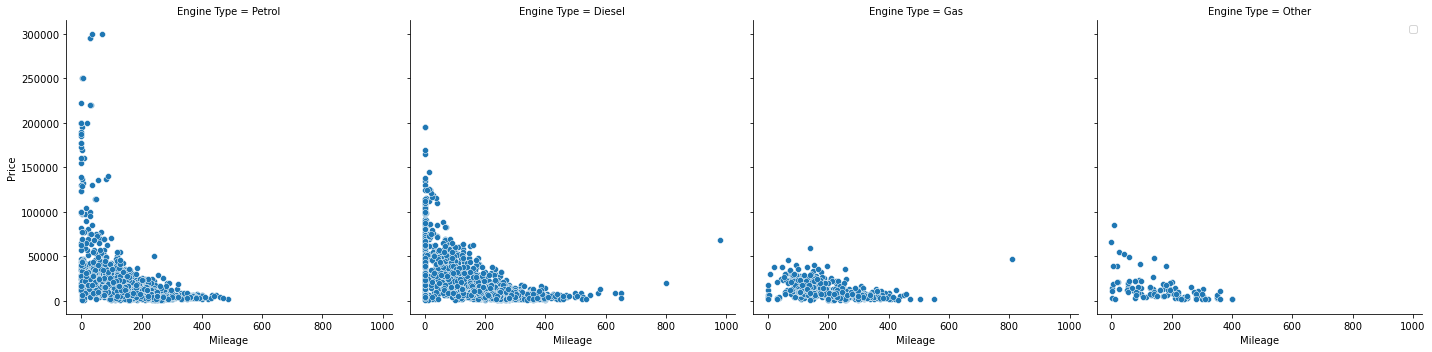

In [60]:
sns.relplot(x='Mileage',y='Price',data=df_1,kind='scatter',col='Engine Type')
plt.legend()
plt.show()

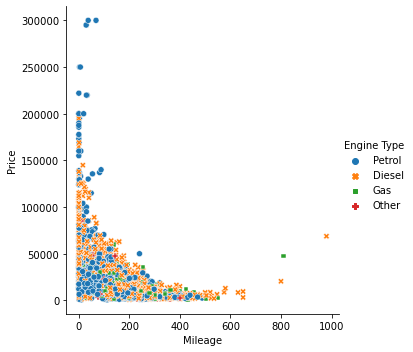

In [62]:
#extracting the mileage versus price of different engine type.
sns.relplot(x='Mileage',y='Price',data=df_1,kind='scatter',hue='Engine Type',style ='Engine Type')
plt.show()

No handles with labels found to put in legend.


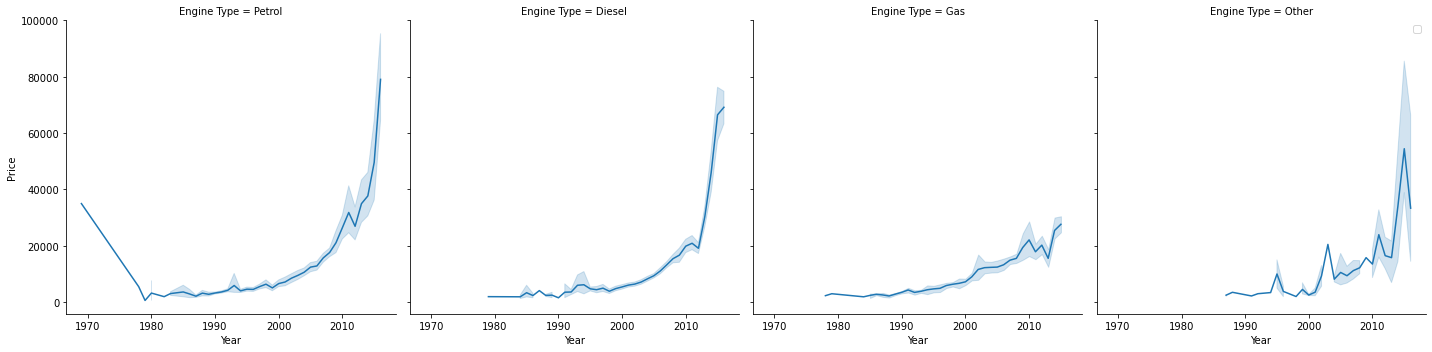

In [67]:
# getting the price flunctuation with year in reference to Engine Type
sns.relplot(x='Year',y='Price',data=df_1,kind='line',col='Engine Type')
plt.legend()
plt.show()

In [68]:
df_1.Model.nunique()

306

In [69]:
# Getting the unique values of the  brand in descending order
df_1.Brand.value_counts().sort_values(ascending=False)[0:5]

Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Name: Brand, dtype: int64

In [ ]:
# for i in df_1.Brand.value_counts().sort_values(ascending=False)[0:5].index:
#     print(i,df_1.Brand.value_counts().sort_values(ascending=False)[0:5].values)
    

In [ ]:
#extract  the data types
df_1.info()

In [ ]:
df_2 = df_1['Brand']=='Volkswagen'

In [ ]:
df_2

In [ ]:
data_int_float = df_1[['Price','Mileage','EngineV','Year']]

In [ ]:
data_int_float

In [ ]:
data_int = data_int_float.copy()

In [ ]:
data_int

In [ ]:
df_1['Brand'].value_counts() # Extracting the different count of Brand

In [ ]:
# getting the count plot
sns.countplot(x=df_1['Brand'],data=df_1)

In [ ]:
k = df_1['Brand'].sort_values(ascending=False)

In [ ]:
k

In [ ]:
# Extracting the most five brand in descending order
sns.countplot(y=k,data=df_1)

In [ ]:
df_1[(df_1['Brand']=='Volkswagen')|(df_1['Brand']=='Renault')]['Brand'].value_counts()

In [ ]:
df_1['Brand'].value_counts()

In [ ]:
df_1[(a)|(b)]

In [ ]:
df_brand.head(50)

In [ ]:
# get the details of the dataset
df_1.describe(include='all')

In [ ]:
df_1.nunique()

In [ ]:
# detailing the Engine Type
df_1['Engine Type'].unique()

In [ ]:
df_1.isnull().sum()

In [ ]:
df_1.shape # getting the nxm of the data

In [ ]:
 a = df_1.shape[0] 

In [ ]:
b = df_1['Price'].isnull().sum() + df_1['EngineV'].isnull().sum()

In [ ]:
c = b/a 

In [ ]:
c*100

In [ ]:
#data = df_1.copy()

In [ ]:
df_1.head()

In [ ]:
new_data = df_1.drop(['Model'],axis=1) # removing the model variable in the data column

In [ ]:
new_data.head()

In [ ]:
new_data.dropna(axis=0)

In [ ]:
# extract the details of the data
new_data.describe(include='all')

In [ ]:
new_data.isnull().sum()

In [ ]:
new_data.dropna(subset=['Price','EngineV'])

In [ ]:
new_data

In [ ]:
new_data.isnull().sum()

In [ ]:
# ploting the price distribution
sns.displot(new_data['Price'])

In [ ]:
# cutting off the outlier by getting price less than #15000
k = new_data['Price'] < 15000

In [ ]:
l = new_data[k]

In [ ]:
l

In [ ]:
sns.distplot(l['Price'])

In [ ]:
n_q = new_data['Price'].quantile(0.99)

In [ ]:
new_data[new_data['Price'] < n_q]

In [ ]:
data_2 = new_data[new_data['Price'] < n_q]

In [ ]:
data_2

In [ ]:
sns.displot(data_2['Price'])

In [ ]:
# Plotting the distribution
data_3 = new_data[new_data['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

In [ ]:
q = new_data['Year'].quantile(0.01)

In [ ]:
q

In [ ]:
data_4 = new_data[new_data['Year']>q]

In [ ]:
sns.displot(data_4['Year'])

In [ ]:
data_cleaned = data_4.reset_index(drop=True)

In [ ]:
data_cleaned

In [ ]:
#Checking for Ols Assumotion
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey =True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and Engine')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Milleage')

In [ ]:
# Relaxing the Assumption
data_cleaned['log_Price']=np.log(data_cleaned['Price'])

In [ ]:
data_cleaned.drop('Price',axis=1)

In [ ]:
sns.displot(data_cleaned['log_Price'])

In [ ]:
data_cleaned.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#i = variables.shape[0]

In [ ]:
variables = data_cleaned[['Mileage','Year','EngineV']]

In [ ]:
for i in range (variables.shape[1]):
    vif = pd.DataFrame()
   # vif['VIF']=[variance_inflation_factor(variables.values,i)

In [ ]:
vif

In [ ]:
vif = pd.DataFrame()

In [ ]:
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [ ]:
i = variables.shape[1]

In [ ]:
for i in range (variables.shape[1]):
    print(i)

In [ ]:
variables.values

In [ ]:
variables.values[0]

In [ ]:
variables.values[1]

In [ ]:
variables.columns

In [ ]:
data_cleaned.drop(['Year'], axis = 1)

In [ ]:
# getting dummies
data_preprocessed = pd.get_dummies(data_cleaned)

In [ ]:
data_preprocessed.head()